# Trend derivation

In this Lesson we will learn some basic techniques of timeseries analysis.  

## Linear Regression with Least Squares Fit

One of the simplest techniques to fit a best fit curve $y$  is the simple linear regression model.

**1. The Linear Model**

We assume our data can be modeled by a linear relationship:

$y = mx + c$


where:

* `y` is the dependent variable.
* `x` is the independent variable.
* `m` is the slope of the line.
* `c` is the y-intercept.

**2. The Least Squares Method**

Our goal is to find the values of $m$ and $c$ that best fit the data. The least squares method minimizes the sum of the squared differences between the observed $y$ values and the predicted $y$ values from our linear model.


Let's say we have $n$ data points: $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$. The error (or residual) for each point is:

$e_i = y_i - (m x_i + c)$

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" width=300 height=300 />

The sum of squared errors (SSE) is:

$SSE = \sum (y_i - (m x_i + c))^2  $


To minimize SSE, we take the partial derivatives with respect to `m` and `c` and set them to zero:

$\partial (SSE) / \partial m = 0$

$\partial (SSE) / \partial c = 0$


Solving these equations yields the following formulas for `m` and `c`:

We estimate $\beta_0$ and $\beta_1$ using the method of least squares, which minimizes the sum of squared residuals. This yields the following estimators:

* Slope:
    $$m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$
* Intercept:
    $$c = \bar{y} - m \bar{x}$$

Where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$, respectively.

If $\bar{x}$ and $\bar{y}$ are unknown, then the following formula can be applied

$m = (n \sum (x_i y_i) - \sum (x_i) \sum(y_i)) / (n \sum(x_i^2) - ( \sum(x_i))^2)$

$c = (\sum(y_i) - m \sum(x_i)) / n$


where:

* $\sum(x_i)$ is the sum of all `x` values.
* $\sum(y_i)$ is the sum of all `y` values.
* $\sum(x_i y_i)$ is the sum of the products of `x` and `y` values.
* $\sum(x_i^2)$ is the sum of the squares of `x` values.

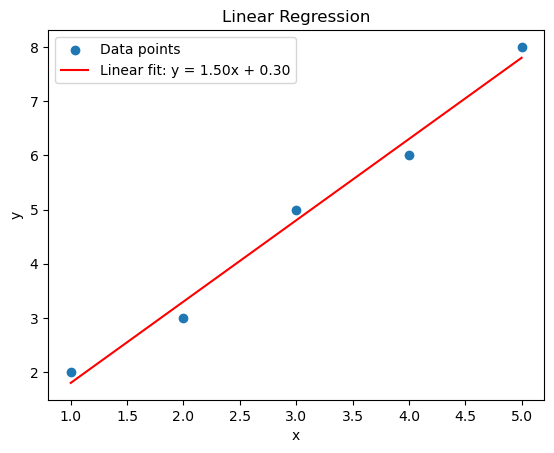

Slope (m): 1.5
Y-intercept (c): 0.3


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y):
    """
    Fits a linear model to the data using the least squares method.

    Args:
        x: Array of x values.
        y: Array of y values.

    Returns:
        m: Slope of the line.
        c: Y-intercept of the line.
    """
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x2 = np.sum(x**2)

    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    c = (sum_y - m * sum_x) / n

    return m, c

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 6, 8])

# Calculate slope and intercept
m, c = linear_regression(x, y)

# Generate predicted y values
y_pred = m * x + c

# Plot the data and the regression line
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()

print(f"Slope (m): {m}")
print(f"Y-intercept (c): {c}")

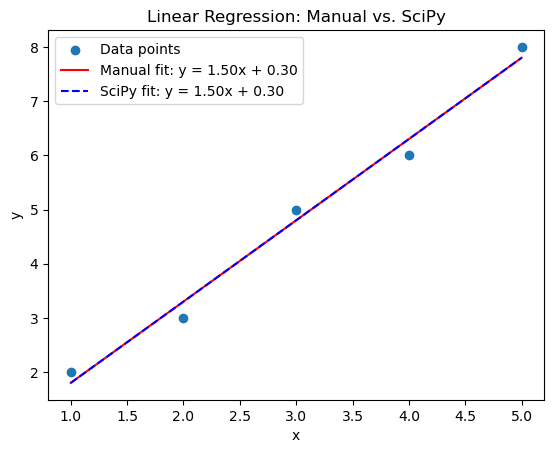

In [2]:
from scipy.stats import linregress
# SciPy calculation
slope_scipy, intercept_scipy, r_value, p_value, std_err = linregress(x, y)
y_pred_scipy = slope_scipy * x + intercept_scipy

# Plotting
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label=f'Manual fit: y = {m:.2f}x + {c:.2f}')
plt.plot(x, y_pred_scipy, color='blue', linestyle='--', label=f'SciPy fit: y = {slope_scipy:.2f}x + {intercept_scipy:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Manual vs. SciPy')
plt.legend()
plt.show()

we can subtract the fit line to get a plot of the residual

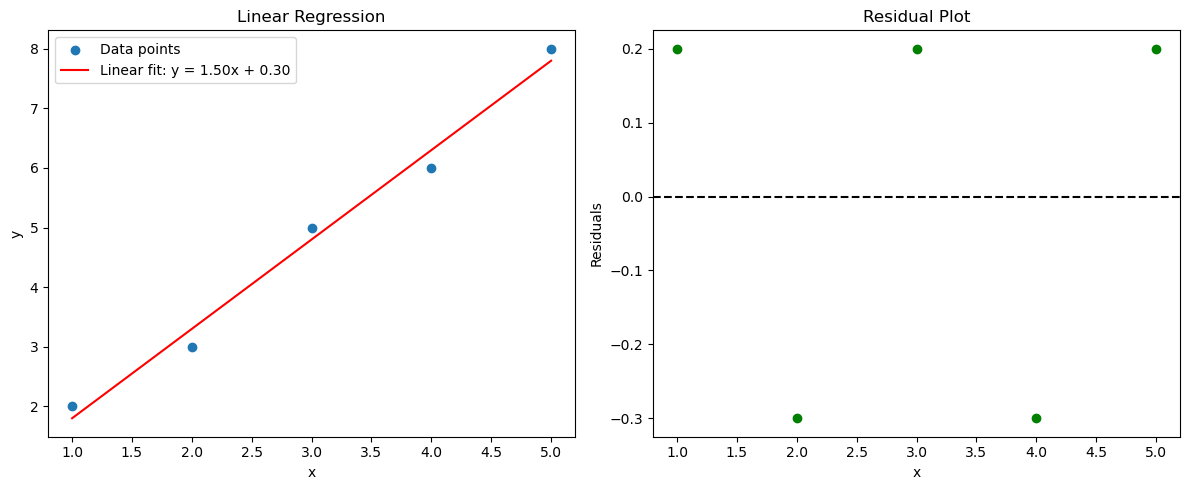

In [3]:

# Plot the data and the regression line using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Subplot 1: Original Data and Regression Line
ax1.scatter(x, y, label='Data points')
ax1.plot(x, y_pred, color='red', label=f'Linear fit: y = {m:.2f}x + {c:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Linear Regression')
ax1.legend()

# Subplot 2: Residual Plot
residuals = y - y_pred
ax2.scatter(x, residuals, color='green')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')

plt.tight_layout() # Improves subplot spacing
plt.show()



## Derivation of Standard Errors for Intercept and Slope in Linear Regression

In the above we simply assumes a linear model without recourse to uncertainty in the data. In order to consider this we need to make further assumptions about the data, we now generalize the equation to account for uncertainty.  In the following $x$ refers to our explaining variable, often referred to as the independent variable.  We assume that our dependent variable $y$ is related to $x$ linearly, but now subject to an error, or uncertainty, which we represent by $\epsilon$. This uncertainty could have many sources. It could be partly due, for example, to measurement uncertainty in either variable.  Alternatively, $y$ could have multiple explaining variables, some of which are unknown or unobserved.  For example, ice cream sales are likely to be a function of temperature, but also population density and also the state of the economy, which also change in time and location.  Thus relating the former only to temperature will neglect the latter two which will introduce "spread" in the ice cream-temperature relationship. 

Thus we write 

$$y_i = c + m x_i + \epsilon_i$$

Where:

* $y_i$ is the dependent variable for the $i$-th observation.
* $x_i$ is the independent variable for the $i$-th observation.
* $c$ is the true intercept.
* $m$ is the true slope.
* $\epsilon_i$ is the error term for the $i$-th observation.


We make the following assumptions about the error terms:

* $E(\epsilon_i) = 0$ (mean of zero).
* $Var(\epsilon_i) = \sigma^2$ (constant variance).
* $\epsilon_i$ are independent.
* In general, we need to assume $\epsilon_i$ are normally distributed.


### Variance of the Slope ($m$)

To derive $Var(m)$, we substitute the linear model into the formula for $m$ and apply the properties of variance. After algebraic manipulations, we get:

$$Var(m) = \frac{\sigma^2}{\sum (x_i - \bar{x})^2}$$

Since $\sigma^2$ is usually unknown, we estimate it using the residual mean square (MSE):

$$MSE = \frac{\sum (y_i - \hat{y}_i)^2}{n - 2}$$

Where $\hat{y}_i$ are the predicted values.

The standard error of $m$ is the square root of its variance:

$$SE(m) = \sqrt{\frac{\sum(y_i - \hat{y}_i)^2}{(n-2)\sum (x_i - \bar{x})^2}}$$

### Variance of the Intercept ($c$)

Similarly, we derive $Var(c)$:

$$Var(c) = \sigma^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2} \right)$$

Replacing $\sigma^2$ with $s^2$ and taking the square root, we get the standard error of $c$:

$$SE(c) = \sqrt{s^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2} \right)}$$

### Summary

* The standard errors quantify the uncertainty in the estimated intercept and slope.
* The derivations rely on the properties of variance and expected values.
* The standard errors are influenced by:
    * The residual variance ($s^2$).
    * The sample size ($n$).
    * The spread of the $x$ values.
* The $(n-2)$ term in the MSE accounts for the degrees of freedom lost during estimat

# Uncertainty of the Fitted Linear Slope

When performing linear regression, it's not enough to simply find the best-fit slope and intercept. We also need to understand the uncertainty associated with these parameters.

**1. Understanding Uncertainty**

The uncertainty in the slope arises from the inherent noise and variability in the data. Even if the underlying relationship between `x` and `y` is perfectly linear, random fluctuations in the measurements will cause the fitted slope to deviate slightly from the true value.

**2. Standard Error of the Slope**

A common measure of the uncertainty in the slope is its *standard error*. The standard error of the slope (often denoted as $\epsilon_m$) quantifies the typical deviation of the fitted slope from the true slope. A smaller standard error indicates a more precise estimate of the slope.

**3. Formula for the Standard Error of the Slope**

The standard error of the slope can be estimated using the following formula:

$\epsilon_m = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{(n-2) \sum_{i=1}^{n} (x_i - \bar{x})^2}}$
Where:

$y_i$ are the observed y-values.

$\hat{y}_i$ are the predicted y-values from the fitted line.

$n$ is the number of data points.

$\bar{x}$ is the mean of the x-values.

Explanation of the Formula:

Numerator: The numerator involves the sum of squared residuals, which represents the overall variability of the data around the fitted line. n-2 is the number of degrees of freedom of the sample data, and thus to get the variance we divide by n-2.
Denominator: The denominator involves the sum of squared deviations of the x-values from their mean. A larger spread in the x-values leads to a smaller standard error of the slope, indicating a more precise estimate.

**4. Confidence Intervals**

The standard error can be used to construct confidence intervals for the slope. A (1 - α) confidence interval for the slope is given by:

$m +/- t_{\alpha/2, n-2} \epsilon_m$

Where:

$m$ is the fitted slope. $t_{\alpha/2, n-2}$ is the critical t-value from the t-distribution with n-2 degrees of freedom, corresponding to a significance level of α.
$\epsilon_m$ is the standard error of the slope.
A 95% confidence interval ($\alpha$ = 0.05) means that we are 95% confident that the true slope lies within the calculated interval.

# Application to CRU temperature data

We will know apply these methods to temperature data from CRU to calculate mean temperature trends.  First let's get a file


In [2]:
import subprocess
import os

def download_file(url, output_path=None):
    """
    Downloads a file from a URL using wget.

    Args:
        url: The URL of the file to download.
        output_path: The path where the file should be saved. If None, the file
                     is saved in the current directory with its original name.
    """
    try:
        # Construct the wget command
        if output_path:
            command = ["wget", "-q", "-O", output_path, url]
        else:
            command = ["wget", "-q", url]

        # Run the wget command
        subprocess.run(command, check=True)

        if output_path:
            print(f"File downloaded successfully to: {output_path}")
        else:
            print(f"File downloaded successfully.")

    except subprocess.CalledProcessError as e:
        print(f"Error downloading file: {e}")
    except FileNotFoundError:
        print("wget command not found. Make sure it's installed and in your PATH.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")



In [3]:
# Example usage:
datadir="/Users/tompkins/DATA/CRU/"

filename="cru_ts4.08.1901.2023.tmx.dat.nc" # TMAX
#filename="cru_ts4.08.1901.2023.tmp.dat.nc" #TMEAN
url_to_download = "http://clima-dods.ictp.it/Users/tompkins/Observations/CRU/CRU_TS4.08/"+filename 
output_file_path = datadir+filename

download_file(url_to_download, output_file_path) #or download_file(url_to_download)

File downloaded successfully to: /Users/tompkins/DATA/CRU/cru_ts4.08.1901.2023.tmx.dat.nc


### extracting a grid point
<details>
<summary>
If you have been following my video course, you will know how to use cdo to extract a grid point.
</summary>
We use cdo remapnn for nerest neighbour remapping, followed by a coordinate argument ",lon=X/lat=Y".
</details>



Actually not, changed my mind, let's keep this for a later lesson(!)

We are going to implement this showing you how the use cdo embedded in python

In [15]:
from cdo import Cdo
cdo=Cdo # cdo instance 


In [16]:

ofilename="cru_ts4.08.1901.2023.tmx.year.nc"
input_file = datadir+filename
cru_file = datadir+ofilename
start_date = "19500101"
end_date = "20250101"

try:
    cdo.yearmean(input=f"-seldate,{start_date},{end_date} {input_file}", output=cru_file)
    print(f"CDO command executed successfully. Output written to {cru_file}")
except cdo.CdoError as e:
    print(f"CDO command failed with error: {e}")
except FileNotFoundError:
    print("CDO executable not found. Make sure it's in your PATH.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# cdo -yearmean -seldate,19500101,20250101 cru_ts4.08.1901.2023.tmx.dat.nc cru_ts4.08.1901.2023.tmx.year.nc

CDO command executed successfully. Output written to /Users/tompkins/DATA/CRU/cru_ts4.08.1901.2023.tmx.year.nc


In [6]:
import netCDF4
import numpy as np


with netCDF4.Dataset(cru_file, 'r') as ncfile:
    time = ncfile.variables['time'][:]
    temp = ncfile.variables['tmx'][:]  # Temperature data
    lat = ncfile.variables['lat'][:]
    lon = ncfile.variables['lon'][:]

# Convert time to years
    #units = ncfile.variables['time'].units
    #calendar = ncfile.variables['time'].calendar if 'calendar' in ncfile.variables['time'].ncattrs() else "standard"
    #years = netCDF4.num2date(time, units=units, calendar=calendar).astype('datetime64[Y]').astype(int)
           
    # Convert time to datetime objects and extract years
    units = ncfile.variables['time'].units
    calendar = ncfile.variables['time'].calendar if 'calendar' in ncfile.variables['time'].ncattrs() else "standard"
    datetime_objects = netCDF4.num2date(time, units=units, calendar=calendar)
    years = np.array([dt.year for dt in datetime_objects])


In [8]:
years

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [11]:
# Calculate trend
from scipy.stats import linregress

trend_file='trend_cru_t.nc'

if True:
    slope_data = np.zeros((len(lat), len(lon)))
    std_err_data = np.zeros((len(lat), len(lon)))
    r_value_data = np.zeros((len(lat), len(lon)))
    p_value_data = np.zeros((len(lat), len(lon)))

    for i, lat_val in enumerate(lat):
        for j, lon_val in enumerate(lon):
            timeseries = temp[:, i, j]
            slope, intercept, r_value, p_value, std_err = linregress(years, timeseries)
            slope_data[i, j] = slope
            std_err_data[i, j] = std_err
            r_value_data[i, j] = r_value
            p_value_data[i,j] = p_value

    # Write to NetCDF
    with netCDF4.Dataset(datadir+trend_file, 'w') as ncfile_out:
        ncfile_out.createDimension('lat', len(lat))
        ncfile_out.createDimension('lon', len(lon))

        lat_var = ncfile_out.createVariable('lat', 'f4', ('lat',))
        lon_var = ncfile_out.createVariable('lon', 'f4', ('lon',))
        slope_var = ncfile_out.createVariable('slope', 'f4', ('lat', 'lon'))
        std_err_var = ncfile_out.createVariable('std_err', 'f4', ('lat', 'lon'))
        r_value_var = ncfile_out.createVariable('r_value', 'f4', ('lat', 'lon'))
        p_value_var = ncfile_out.createVariable('p_value', 'f4', ('lat', 'lon'))

        lat_var[:] = lat
        lon_var[:] = lon
        slope_var[:] = slope_data
        std_err_var[:] = std_err_data
        r_value_var[:] = r_value_data
        p_value_var[:] = p_value_data

    print(f"Trend calculation successful. Results written to {trend_file}")

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Trend calculation successful. Results written to trend_cru_t.nc


<summary>
    We could have achieved the same using the following cdo command:
    <details>
        cdo trend in.nc out.nc
    </details>
</summary>


Shall we make a map of the trend in python too?

For this we use cartopy (replaced basemap).


In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [26]:


def plot_temperature_trend(netcdf_file,max_val=0.05):
    """
    Plots pre-calculated global temperature trends from a NetCDF file,
    assuming the trend is stored in a variable named 'slope'.

    Args:
        netcdf_file (str): Path to the NetCDF file.
    """
    try:
        # Open the NetCDF file using xarray
        ds = xr.open_dataset(netcdf_file)

        # Check if the 'slope' variable exists
        if 'slope' not in ds.variables:
            print("Error: 'slope' variable not found in the NetCDF file.")
            return

        slope = ds['slope']

        vmax = max_val
        vmin = -max_val
        # Plot the trend on a global map using Cartopy
        plt.figure(figsize=(12, 6))
        ax = plt.axes(projection=ccrs.PlateCarree())

        slope.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'shrink': 0.8,'label':'(K/year)'},vmin=vmin,vmax=vmax)

        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_global()
        plt.title("Global Annual Temperature Trend")
        plt.show()

    except FileNotFoundError:
        print(f"Error: NetCDF file '{netcdf_file}' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

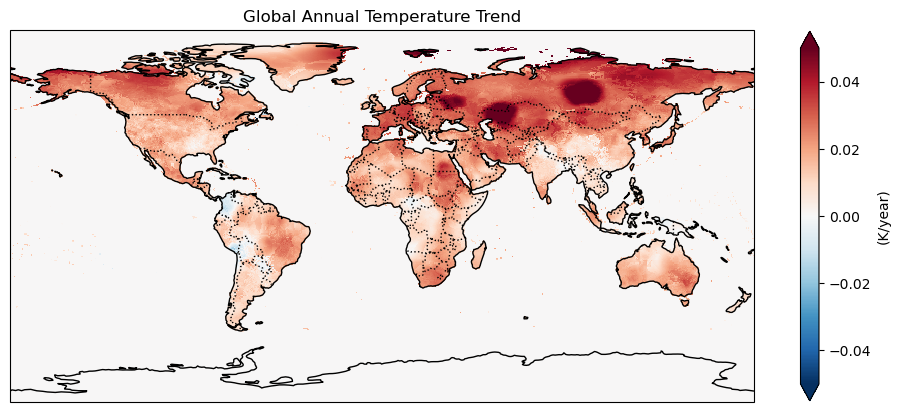

In [27]:
mplot=plot_temperature_trend(datadir+trend_file)